# PHAS0030 Assignment Week 6

Ben Elliot 21005900

In this notebook we will be working on the 1D wave equation for a material with a changing refractive index. This is represented by the equation:

$$\frac{\partial^2 \theta}{\partial t^2} = c(x)^2 \frac{\partial^2 \theta}{\partial x^2} $$

Where $c(x) = \frac{c}{n(x)}$ and $n(x)$ is a refractive index that changes with position. We represent c(x) in this code by the array r $ = c \frac{\Delta t}{\Delta x}$.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation explicitly using finite differences
    Inputs: 
    theta_n:   Wave at time t_n    
    theta_nm1: Wave at time t_{n-1}
    r:         Array of r values - Needs to be the same legnth as theta_n and theta_nm1
    
    Returns:
    theta at time t_{n+1} """
    theta_rollR = np.roll(theta_n, 1)
    
    theta_rollL = np.roll(theta_n, -1)

    theta_np1 = 2.0*(1-r**2)*theta_n - theta_nm1 + r**2*(theta_rollR + theta_rollL)
    return theta_np1
 

#### Changes of r being an array rather than a constant

As r is set up as a numpy array, nothing was needed to be changed in the update function as when a numpy array is squared and multiplied ot something else, it is done element wise so each x point is mapped to the corresponding r point.

### 2. Set up the wave, arrays and initial conditions

In [3]:
wavelen = 1                   #m
wavevector = 2*np.pi/wavelen  #1/m
freq = 1                      #Hz
ang_freq = 2*np.pi*freq       #1/s
c = wavelen*freq              #m/s


# Define number of points in a wavelength and factor r
N = 20
mult =  10 # Number of wavelengths
mult_shown = 5 #Number of wavelengths to be shown on graph
r = 0.3*np.ones(mult*N)

# Initialise
dx = wavelen/(N)
dt = r[0]*dx/c
x = np.arange(0, mult*wavelen, dx)
# Start and end points for change of r
rStart =  2 * wavelen * int(len(x)/mult)
rEnd = 3 * wavelen * int(len(x)/mult)

r[rStart:rEnd] = 0.15


### 3. Run the solver, storing the results, and plot

In [4]:
t = 0
theta_0 = np.sin(wavevector * x - ang_freq*t)
t += dt
theta_1 = np.sin(wavevector * x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0[int(len(x)/mult):] = 0.0
theta_1[int(len(x)/mult):] = 0.0 
# Run for at least 300 steps
iters = 302
store_theta = np.zeros((iters,len(x)))

store_theta[0] = theta_0
store_theta[1] = theta_1
for n in range(2, iters):
    t += dt
    store_theta[n] = explicit_wave_eq_update(store_theta[n-1],store_theta[n-2],r)
    

#### 3.1 3D plot

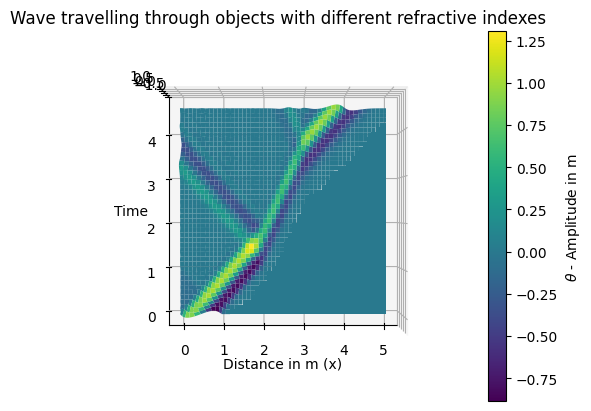

In [5]:
from mpl_toolkits.mplot3d import Axes3D
t_arr = np.arange(0, iters*dt, dt)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

first_5 = mult_shown * wavelen * int(len(x)/mult) #Index at end of first 5 wavelengths

t2D, x2D = np.meshgrid(t_arr, x[:first_5])


plot1 = ax1.plot_surface(x2D.T, t2D.T, store_theta[:, :first_5], cmap = 'viridis')
ax1.view_init(90, 270)
#Labels
ax1.set(xlabel = "Distance in m (x)", ylabel = "Time", title = "Wave travelling through objects with different refractive indexes")
plt.colorbar(plot1, ax=ax1, label=r"$\theta$ - Amplitude in m")

From this 3D plot, we can see reflection and refraction happening at both of the boundaries between the different refractive indexes (at x = 2 and x = 3). 

We get artifacting of an extra wave after time $\sim$ 3 because we are using the numpy roll function, which means that anything happening on the left of the plot is transferred over to the right of the plot and propegated forwards in time as well. To avoid this showing up in the graph I made the number of wavelengths larger and only plotted the first 5, so any extra effects from this would not show up in the final graph.

This of course is not a great solution to this issue as if we wanted to run the simulation for longer, the left-propegating wave would eventually come back into view of the plot. This also requires extra computational power to simulate more points, however for this example the size of the array is not big enough to make the time taken to compute unreasonable.


#### 3.2 2D subplots

In [ ]:
fig_parts = plt.figure(figsize=(9, 7))

rows = 4
cols = 5
num  = rows*cols

step = int(iters/num)
for i in range(num):
    ax = fig_parts.add_subplot(rows, cols, i+1)
    ax.plot(x[:first_5], store_theta[i*step, :first_5])
    ax.set_ylim((-1.2,1.2))
    ax.set(title=f"t = {i*step}")
fig_parts.suptitle("2D plots of wave varying over time")
fig_parts.supxlabel("Distance in m (x)")
fig_parts.supylabel(r"Amplitude in m ($\theta$)")
fig_parts.tight_layout()


From these graphs it is obviously much harder to see refraction and reflection happening pictorially, however this type of graph is useful for seeing the finer details for different stages of the evolution where in the 3D plot the detail was hard to pick out.

### 4. Varying refractive index

In [ ]:
t = 0
theta_0v = np.sin(wavevector * x - ang_freq*t)
t += dt
theta_1v = np.sin(wavevector * x - ang_freq*t)
# Restrict initial wave to one wavelength
theta_0v[int(len(x)/mult):] = 0.0
theta_1v[int(len(x)/mult):] = 0.0
# Set up rv
rv = 0.3*np.ones(mult*N)
rv[rStart:rEnd] = 0.1*(np.cos(2*np.pi*(x[40:60]-2*wavelen)/wavelen) + 2)
print("r at 2 wavelengths: ", rv[N*2*wavelen])
print("r at 3 wavelengths: ", rv[N*3*wavelen])
plt.plot(x[:first_5],rv[:first_5])
plt.title("Initial values of r")
plt.xlabel("Distance in m (x)")
plt.ylabel("r")

# Run for 600 steps
iters = 602
store_thetav = np.zeros((iters,len(x)))
store_thetav[0] = theta_0v
store_thetav[1] = theta_1v
for n in range(2, iters):
    t += dt
    store_thetav[n] = explicit_wave_eq_update(store_thetav[n-1],store_thetav[n-2],rv)
    

In [ ]:
fig_3d3 = plt.figure()
ax3d3 = fig_3d3.add_subplot(111, projection='3d')

t_arrv = np.arange(0, iters*dt, dt)
t2Dv, x2D = np.meshgrid(t_arrv, x[:first_5])

plot2 = ax3d3.plot_surface(x2D.T, t2Dv.T, store_thetav[:, :first_5], cmap = 'viridis')
ax3d3.view_init(90, 270)
#Labels
ax3d3.set(xlabel = "Distance in m (x)", ylabel = "Time", 
        title = "Wave travelling through object with varying refractive index")
plt.colorbar(plot2, ax=ax3d3, label=r"$\theta$ - Amplitude in m")


Here we can again see some refraction happening within the area of changing refractive index, however much less reflection occurs. I used a 3D plot to show this as it is easier to see the effect of the varying refractive index.

Again the use of the numpy roll function means the space wraps around on itself bringing what would normally be happening on the rightmost boundary over to the left, however the widened original x array and increased number of wavelenths plotted means that the right propegatting wave never reaches the right of the array to be rolled back to the left.